In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Free-Boundary`


In [2]:
using Plots
using FUSE

Precompiling Plots
  ✓ Opus_jll
  ✓ XML2_jll
  ✓ libfdk_aac_jll
  ✓ Gettext_jll
  ✓ XSLT_jll
  ✓ Wayland_jll
  ✓ Glib_jll
  ✓ Xorg_libxcb_jll
  ✓ Xorg_xcb_util_jll
  ✓ Xorg_libX11_jll
  ✓ Xorg_xcb_util_renderutil_jll
  ✓ Xorg_xcb_util_image_jll
  ✓ Xorg_libXrender_jll
  ✓ Xorg_libXext_jll
  ✓ Xorg_xcb_util_keysyms_jll
  ✓ Xorg_xcb_util_wm_jll
  ✓ Xorg_libXfixes_jll
  ✓ Xorg_libxkbfile_jll
  ✓ Xorg_xcb_util_cursor_jll
  ✓ Xorg_libXrandr_jll
  ✓ Libglvnd_jll
  ✓ Xorg_libXinerama_jll
  ✓ Xorg_libXcursor_jll
  ✓ Xorg_xkbcomp_jll
  ✓ Xorg_libXi_jll
  ✓ Cairo_jll
  ✓ Xorg_xkeyboard_config_jll
  ✓ HarfBuzz_jll
  ✓ xkbcommon_jll
  ✓ libass_jll
  ✓ Pango_jll
  ✓ Vulkan_Loader_jll
  ✓ libdecor_jll
  ✓ FFMPEG_jll
  ✓ Qt6Base_jll
  ✓ GLFW_jll
  ✓ FFMPEG
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  40 dependencies successfully precompiled in 50 seconds. 137 already precompiled.
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]
Precompiling FUSE
  ✓ GEOS_jll
  ✓ IntelOpenMP_jll
  ✓ NetCDF_jll
 

In [3]:
dd = IMAS.json2imas(joinpath(dirname(pathof(FUSE)),"..","sample","ITER_pf_active_ods.json"));

In [4]:
@show length(dd.pf_active.supply)
@show length(dd.pf_active.circuit)
@show length(dd.pf_active.coil)

length(dd.pf_active.supply) = 14
length(dd.pf_active.circuit) = 9
length(dd.pf_active.coil) = 14


14

In [5]:
dd.pf_active.coil

14×4 DataFrame
 Row │ name                               function  n_elements  n_total_turns 
     │ String                             Array…    Int64       Float64       
─────┼────────────────────────────────────────────────────────────────────────
   1 │ Central Solenoid 3U (CS3U)         Symbol[]           1          554.0
   2 │ Central Solenoid 2U (CS2U)         Symbol[]           1          554.0
   3 │ Central Solenoid 1U (CS1U)         Symbol[]           1          554.0
   4 │ Central Solenoid 1L (CS1L)         Symbol[]           1          554.0
   5 │ Central Solenoid 2L (CS2L)         Symbol[]           1          554.0
   6 │ Central Solenoid 3L (CS3L)         Symbol[]           1          554.0
   7 │ Poloidal Field Coil 1 (PF1)        Symbol[]           1          248.6
   8 │ Poloidal Field Coil 2 (PF2)        Symbol[]           1          115.2
   9 │ Poloidal Field Coil 3 (PF3)        Symbol[]           1          185.9
  10 │ Poloidal Field Coil 4 (PF4)        Symb

In [21]:
dd.pf_active.supply[1]

1
├─ current_limit_max ➡ 45000 [A]
├─ current_limit_min ➡ -45000 [A]
├─ identifier ➡ "CS3U-1-2"
├─ name ➡ "CPS 41C3CU, CS3U-1-2"
├─ voltage_limit_max ➡ 2100 [V]
└─ voltage_limit_min ➡ -2100 [V]


In [23]:
dd.pf_active.circuit[3].connections

4×56 Matrix{Int64}:
 0  0  0  0  1  0  0  1  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0

In [7]:
conn_matrix = vcat([circuit.connections for circuit in dd.pf_active.circuit]...)

25×56 Matrix{Int64}:
 0  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  1  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     

In [13]:
all(sum(conn_matrix,dims=1) .== 1)

true

In [29]:
dd.pf_active.circuit[1].connections

2×56 Matrix{Int64}:
 0  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0

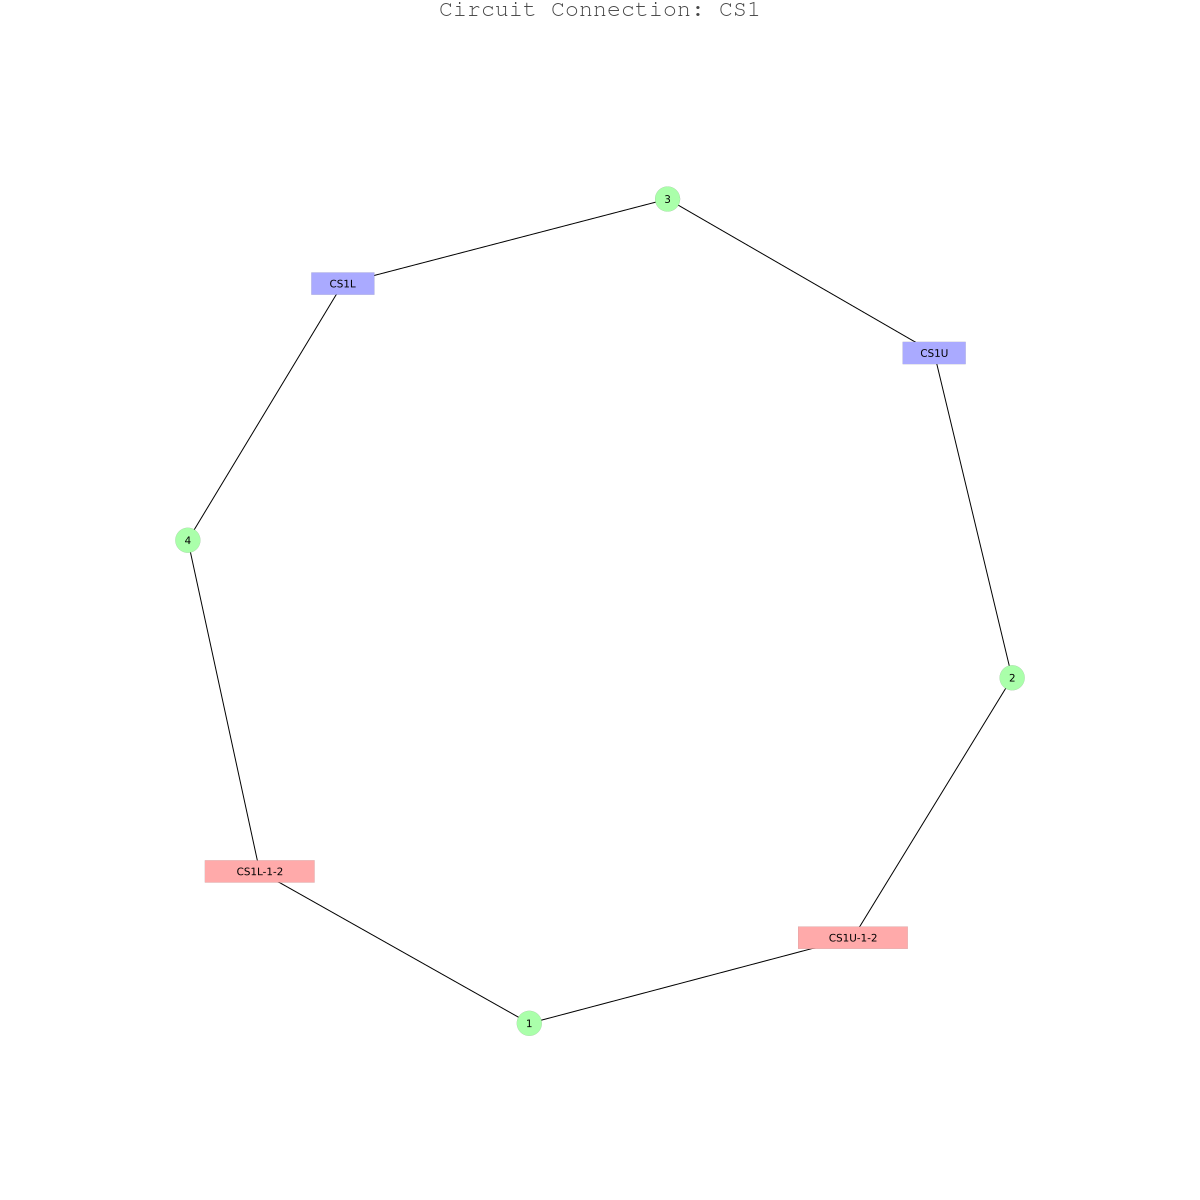

In [33]:
display(plot(dd.pf_active.circuit[3];size=(1200,1200)))
# plt=[]
# for circuit in dd.pf_active.circuit
#     push!(plt, plot(circuit))
# end
# plot(plt...)